In [ ]:
!pip install fastai==2.5.3

In [ ]:
import torch
torch.cuda.is_available()

In [ ]:
# kutubxonalarni yuklab olish
import torch
import fastai

# versiyalarini tekshirish
print(torch.__version__)
print(fastai.__version__)

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

In [ ]:
!cd OIDv4_ToolKit && pip install -r requirements.txt

In [ ]:
!cd OIDv4_ToolKit && python main.py -h

In [ ]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Bicycle Fish Telephone Clock --type_csv train --limit 400

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.053101,0.146743,0.947183,00:30


epoch,train_loss,valid_loss,accuracy,time
0,0.222624,0.116654,0.947183,00:30
1,0.151528,0.132525,0.961268,00:29
2,0.107567,0.115395,0.957747,00:30
3,0.075892,0.159437,0.943662,00:30
4,0.062323,0.156248,0.947183,00:29


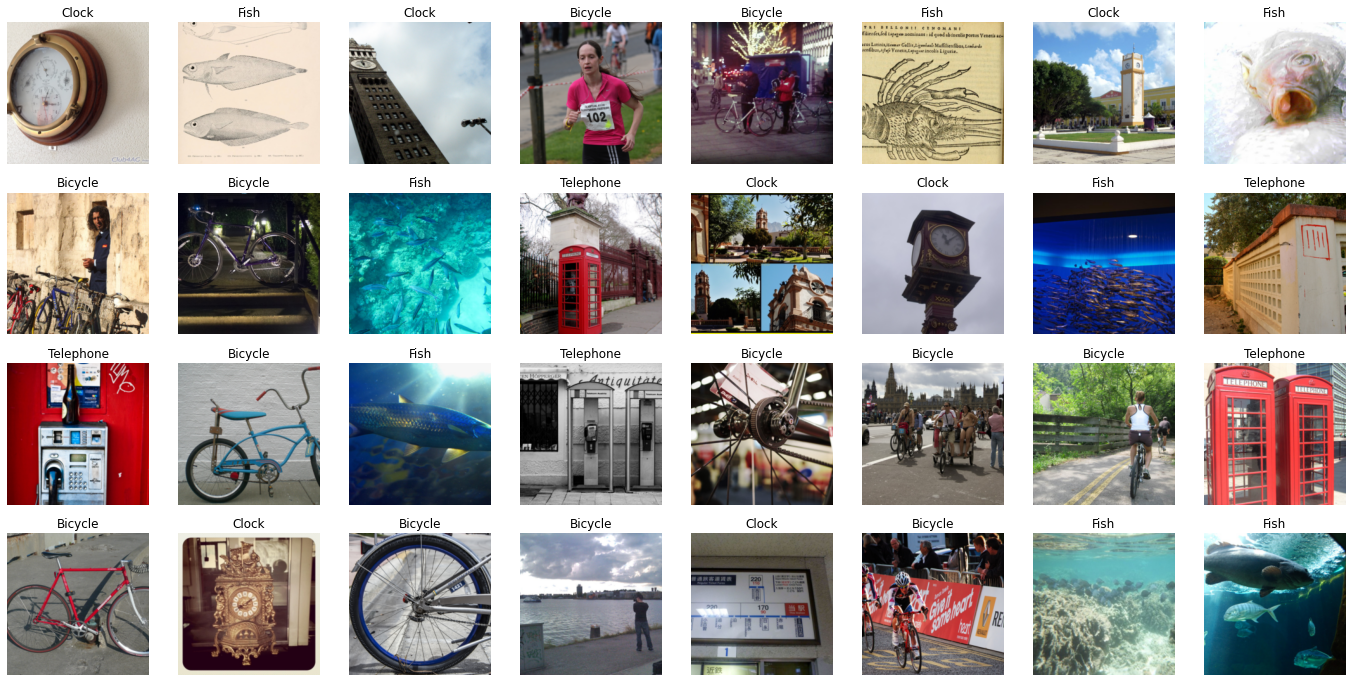

In [8]:
from fastai.vision.all import *
from ipywidgets import widgets

path = Path('train')
fls = get_image_files(path)

#Datablock
transports = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms = Resize(224)
)

#DataLoader yasaymiz
dls = transports.dataloaders(path)

#Datasetni tekshirish
dls.train.show_batch(max_n=32, nrows=4)

#O'qitish (train)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

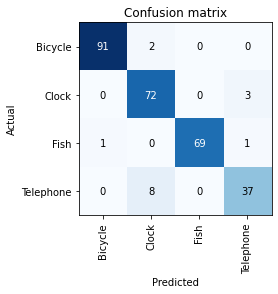

In [9]:
#Tekshirish
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [10]:
#O'zimiz tekshirib ko'ramiz
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat : Fish
Ehtimollik : 99.8%


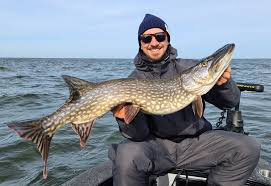

In [12]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)

print(f'Bashorat : {pred}')
print(f'Ehtimollik : {probs[pred_id]*100:.1f}%')
img

In [16]:
learn.export('Loyiha.pkl')

In [17]:
model = load_learner('/content/Loyiha.pkl')

In [18]:
model.predict(img)

('Fish',
 TensorBase(2),
 TensorBase([1.2445e-03, 2.4772e-04, 9.9849e-01, 1.8642e-05]))